In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                        columns=np.append(iris['feature_names'], 'target'))

In [3]:
# Feature selection and feature engineering
features = iris['feature_names']

In [4]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(iris_df, test_size=0.2, random_state=42)


In [5]:
# Train a GradientBoostingClassifier model
def train_gradient_boosting(X_train, y_train, n_estimators=100, max_depth=3, learning_rate=0.1):
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    gb_model.fit(X_train, y_train)
    return gb_model

In [6]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    return accuracy, report, matrix

In [7]:
# Model tweaking, regularization, and hyperparameter tuning
def hyperparameter_tuning(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.05, 0.1, 0.2],
    }
    gb_model = GradientBoostingClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

In [8]:
# Making Predictions with test data
def make_predictions(model, X_test, features):
    predictions = model.predict(X_test)
    results_df = pd.DataFrame({'Actual': test_data['target'].values, 'Predicted': predictions})
    return results_df

In [9]:
# Preprocess the training data
X_train, y_train = train_data[features], train_data['target']

In [10]:
# Train a GradientBoostingClassifier model
gb_model = train_gradient_boosting(X_train, y_train)

In [11]:
# Preprocess the training data
X_train, y_train = train_data[features], train_data['target']

In [12]:
# Train a GradientBoostingClassifier model
gb_model = train_gradient_boosting(X_train, y_train)

In [13]:
# Evaluate the model
X_test, y_test = test_data[features], test_data['target']
accuracy, report, confusion_matrix = evaluate_model(gb_model, X_test, y_test)
print(f'Accuracy of the model on the test set: {accuracy:.2f}')
print('\nClassification Report:')
print(report)
print('\nConfusion Matrix:')
print(confusion_matrix)

Accuracy of the model on the test set: 1.00

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [14]:
# Hyperparameter tuning
best_params = hyperparameter_tuning(X_train, y_train)
print('\nBest Hyperparameters:', best_params)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}


In [15]:
# Make predictions with test data
results_df = make_predictions(gb_model, X_test, features)
print('\nTest Data Predictions:')
print(results_df)


Test Data Predictions:
    Actual  Predicted
0      1.0        1.0
1      0.0        0.0
2      2.0        2.0
3      1.0        1.0
4      1.0        1.0
5      0.0        0.0
6      1.0        1.0
7      2.0        2.0
8      1.0        1.0
9      1.0        1.0
10     2.0        2.0
11     0.0        0.0
12     0.0        0.0
13     0.0        0.0
14     0.0        0.0
15     1.0        1.0
16     2.0        2.0
17     1.0        1.0
18     1.0        1.0
19     2.0        2.0
20     0.0        0.0
21     2.0        2.0
22     0.0        0.0
23     2.0        2.0
24     2.0        2.0
25     2.0        2.0
26     2.0        2.0
27     2.0        2.0
28     0.0        0.0
29     0.0        0.0


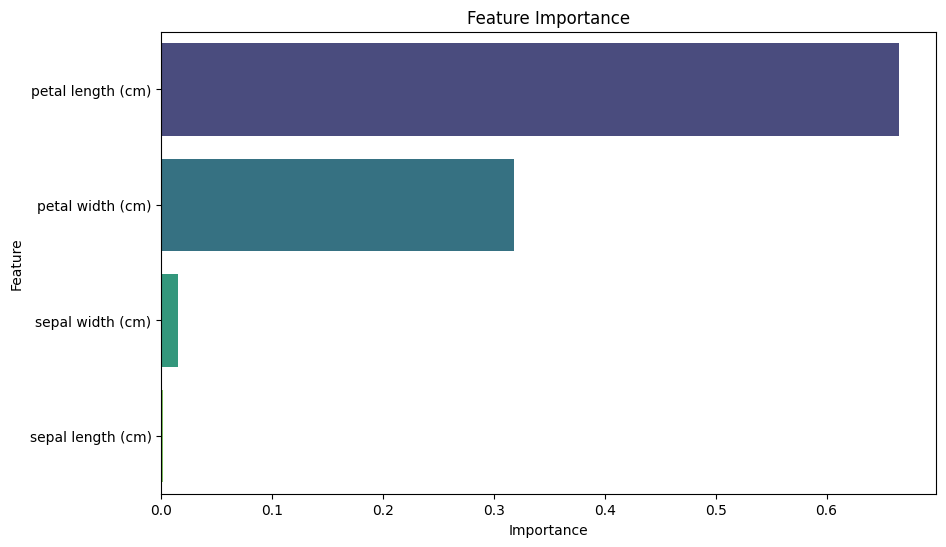

In [16]:
# Visualize feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': gb_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()